## Project Description 
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

#### Attribute Information
##### Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol
##### Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
###### You need to build a classification model. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\winequality-red (2).csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Observations
- No null values found
- There are some high standard deviation for some of the features like (Free sulfur dioxide and Total Sulfur Dioxide)
- Can see right skewed in following features (fixed acidity, residual sugar, total sulfur dioxide, free sulfur dioxide)
- Can see some of the outliers in following features (fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol)

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


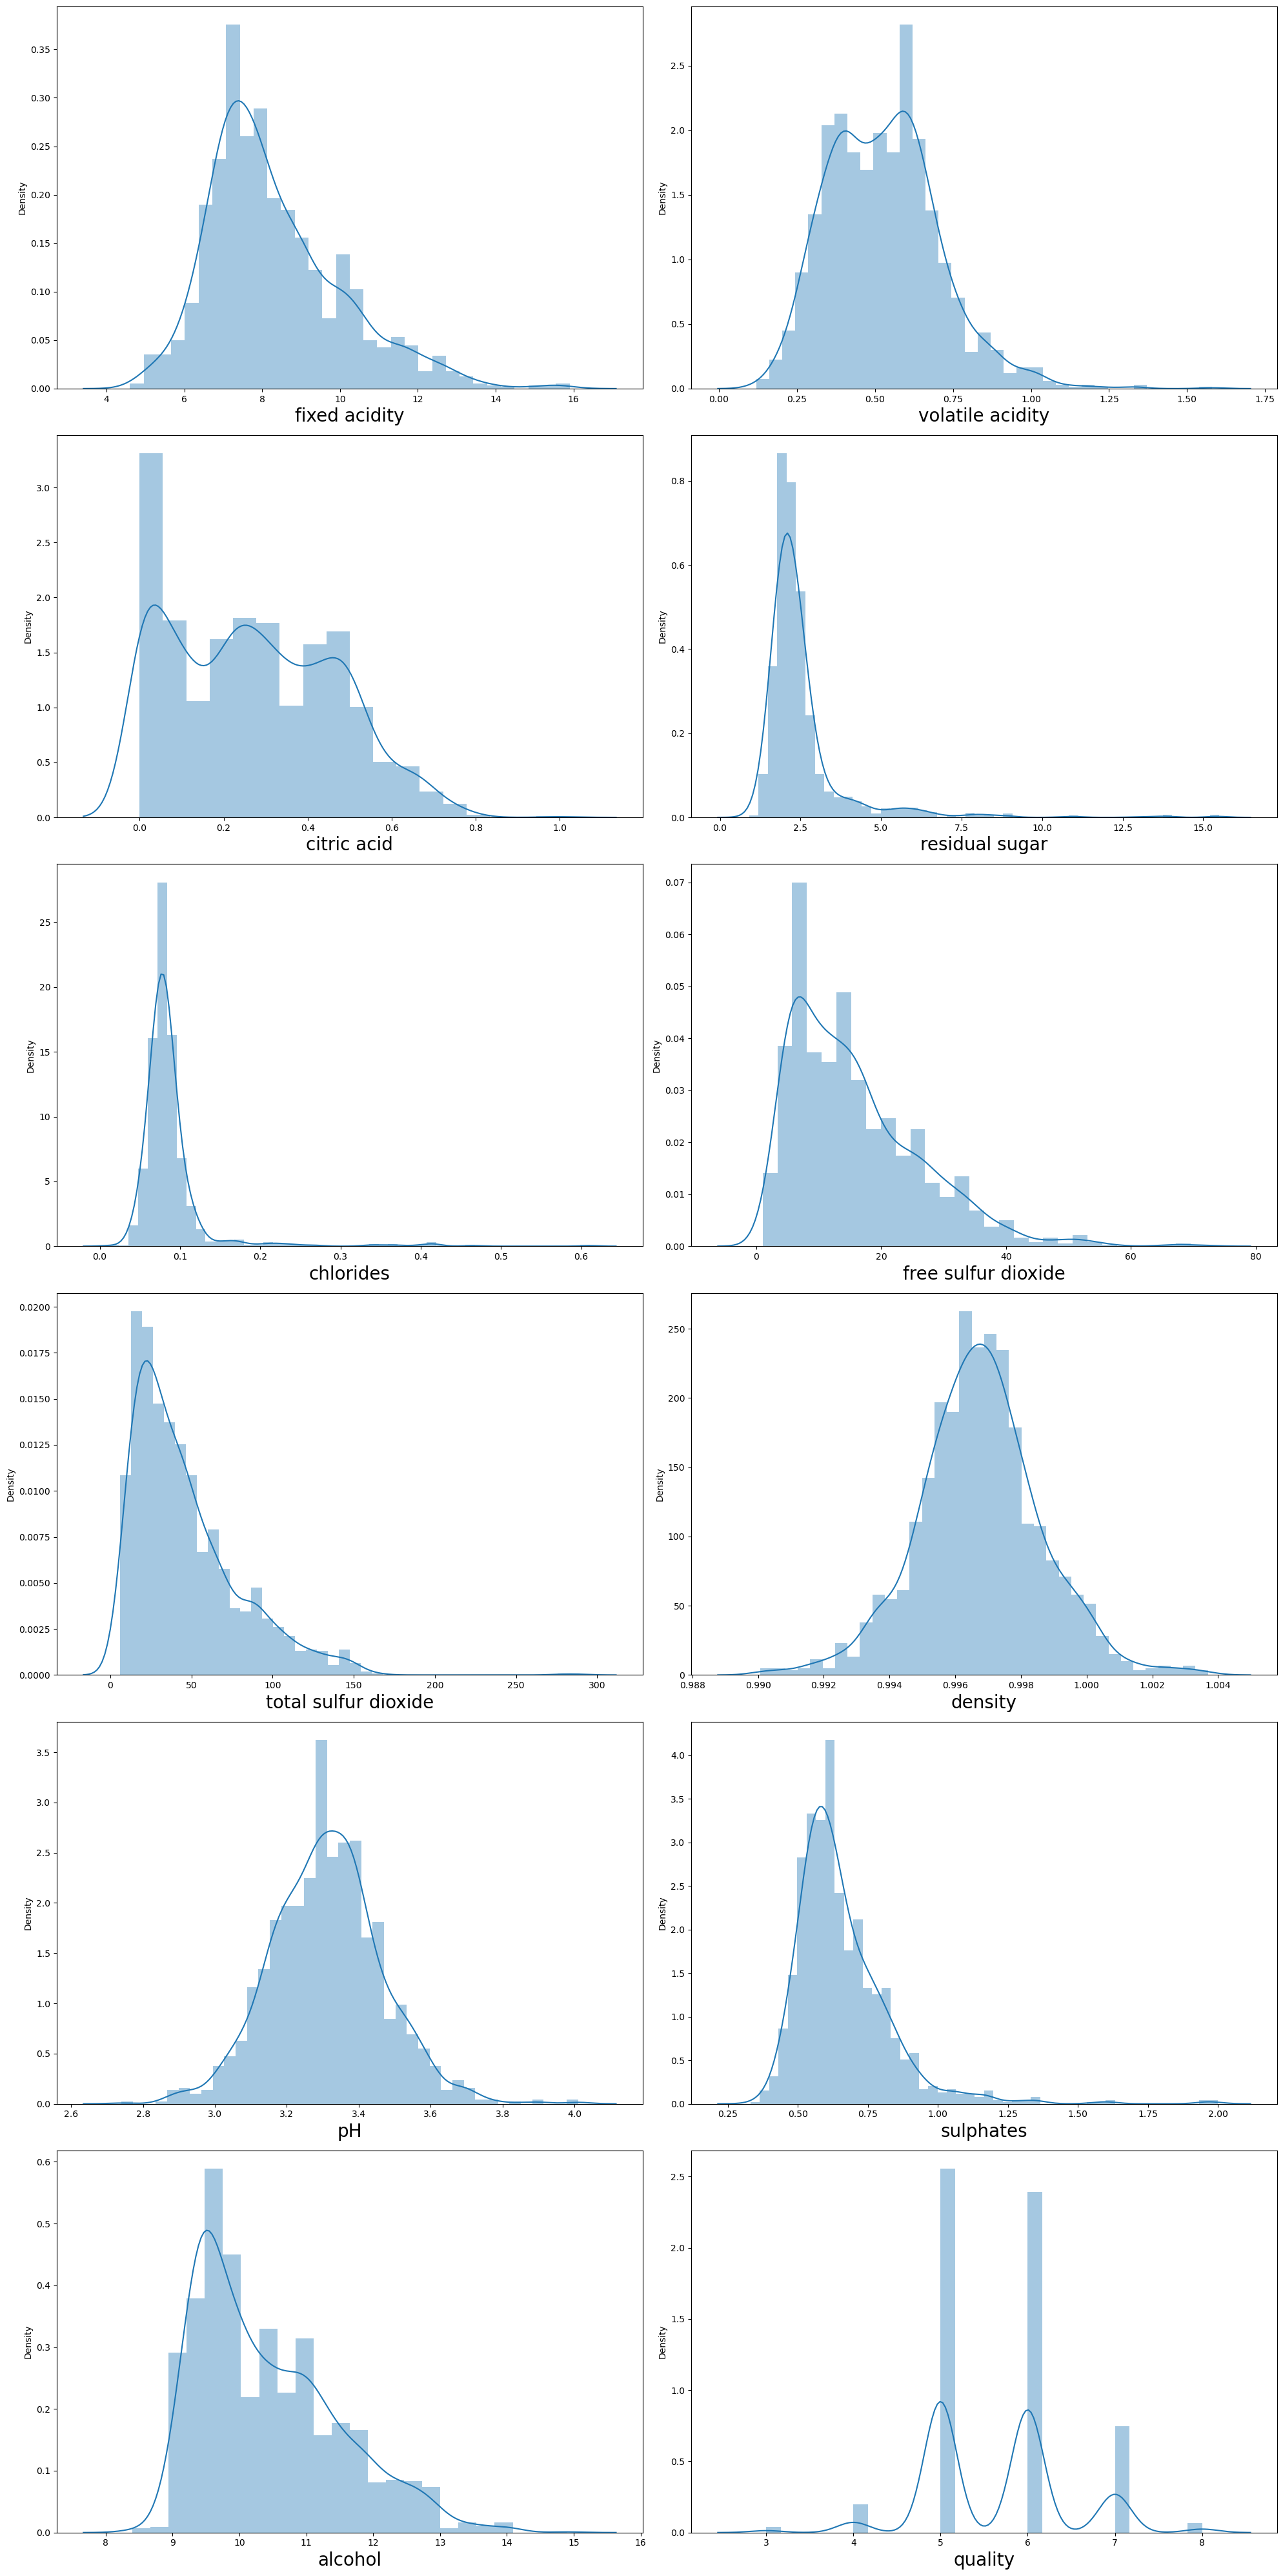

In [8]:
## Check Relationship between columns
plotnumber = 1
plt.figure(figsize = (20, 40))
for i in df.columns:
    if plotnumber <=12:
        plt.subplot(6, 2, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 20)
    plotnumber+=1 
plt.tight_layout()  

### Observations
- Right skewdness in most of the columns

In [9]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

### Observations:
Most of the features having right skewed, will handle it later.

In [10]:
### Seperates features and label to check relationship
x = df.drop('quality', axis =1)
y = df.quality

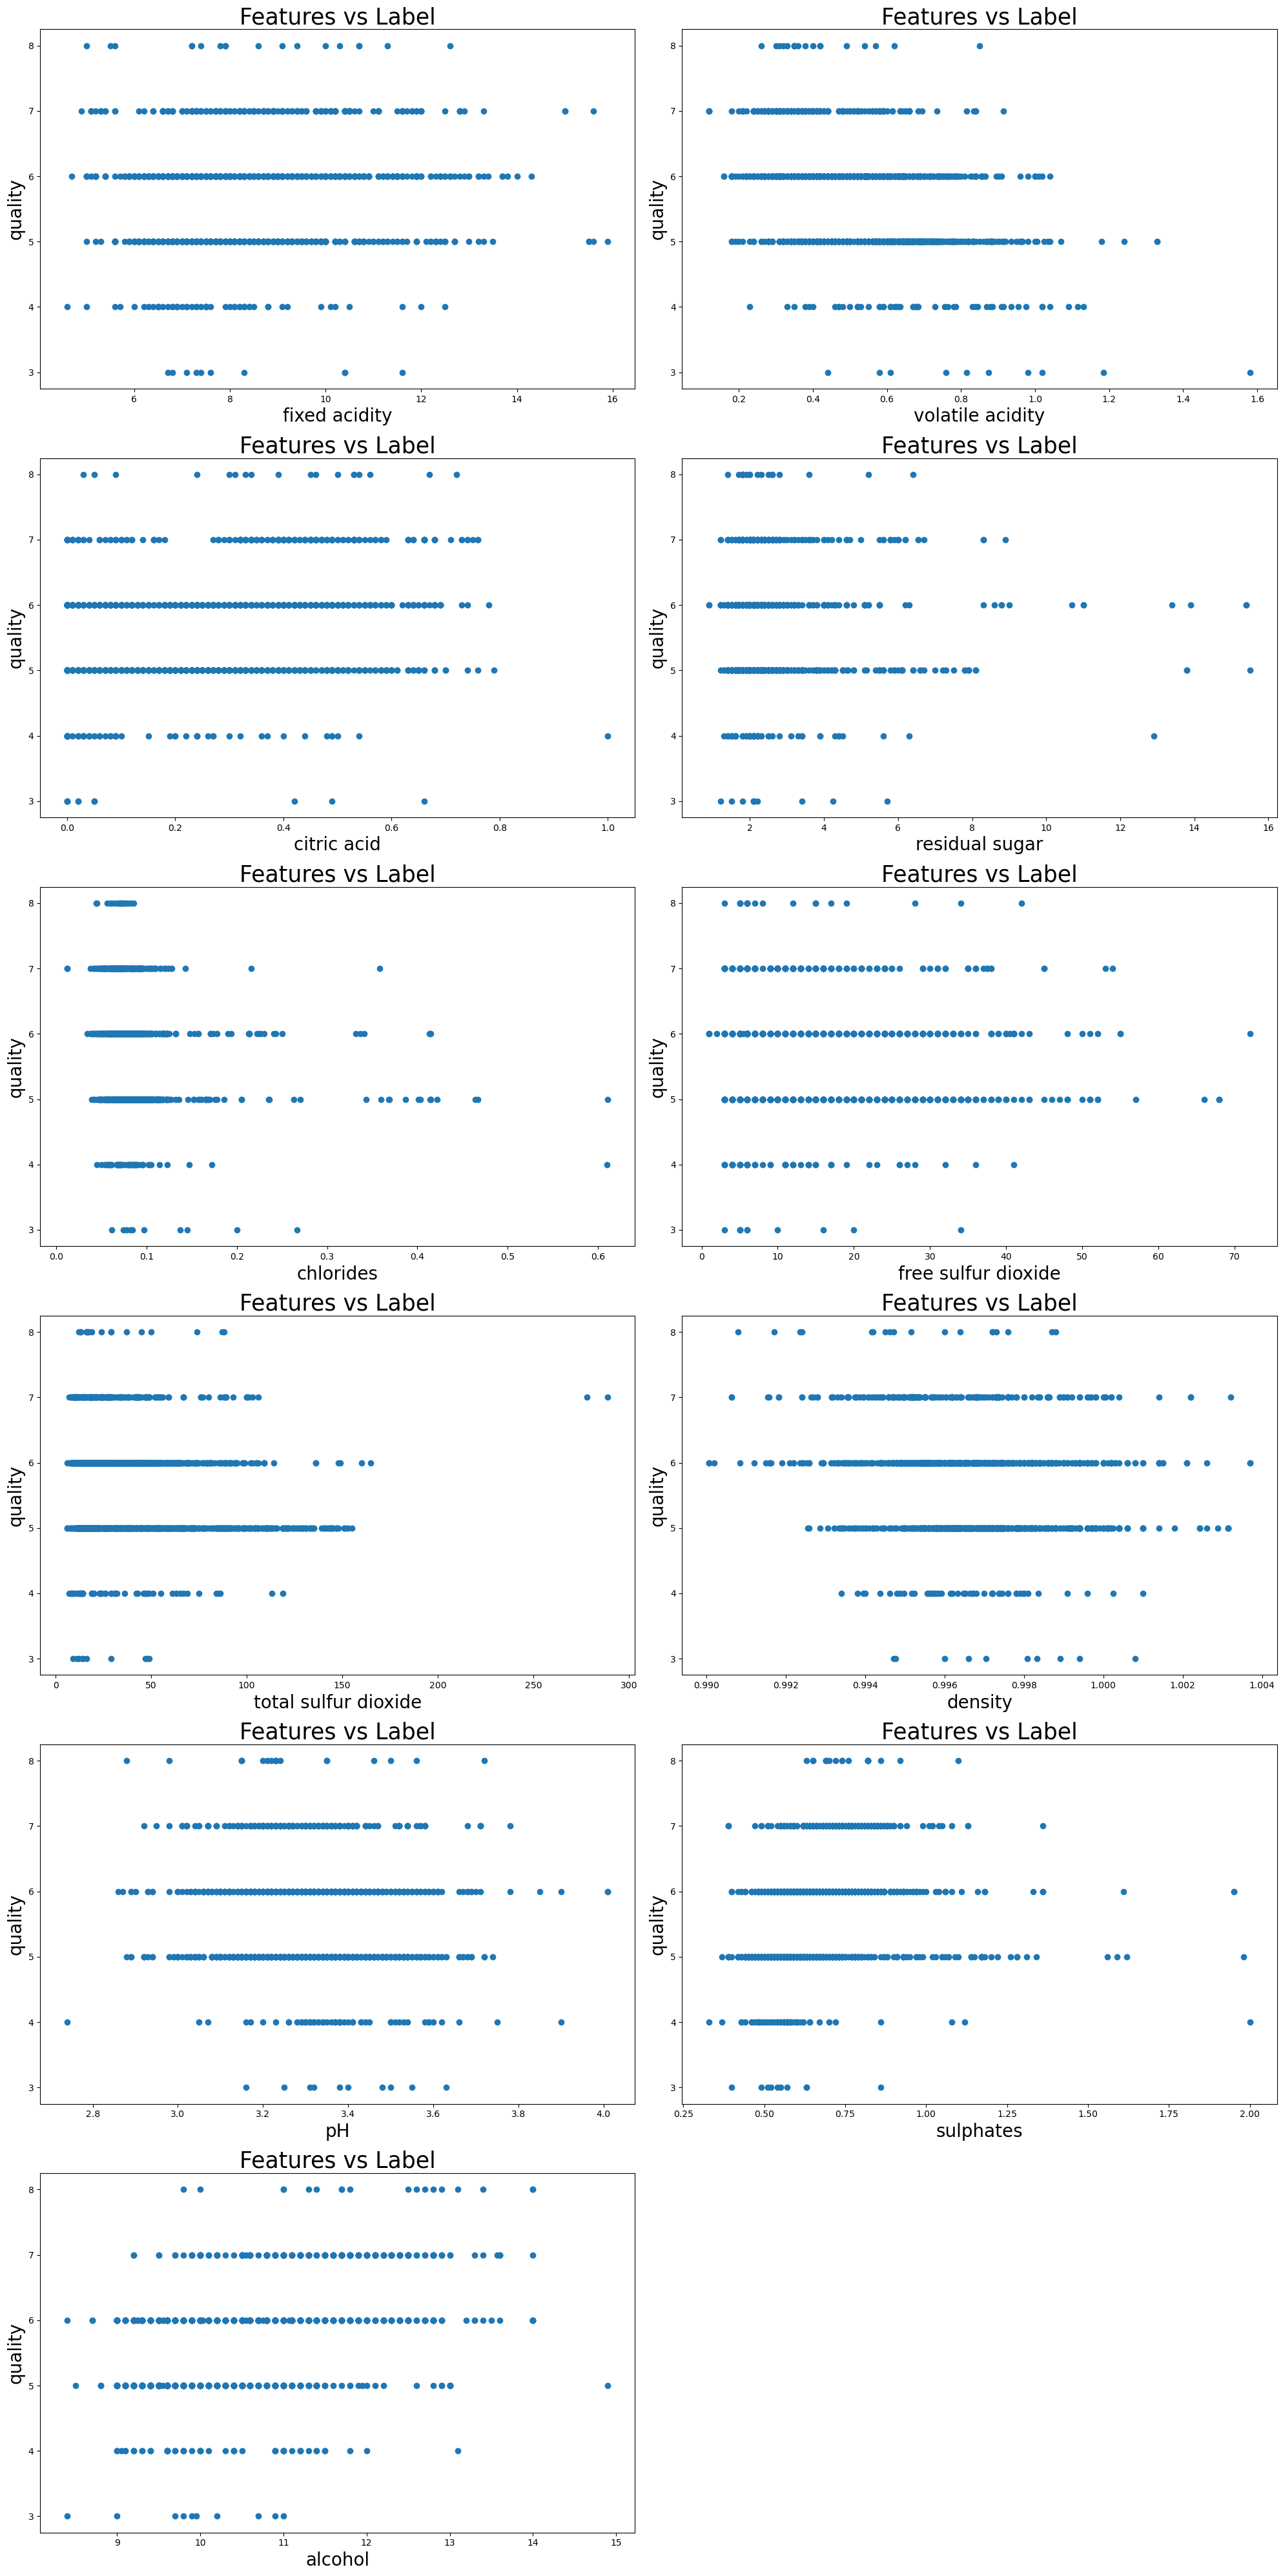

In [11]:
plotnumber = 1
plt.figure(figsize = (20, 40))
for i in x.columns:
    if plotnumber <=12:
        plt.subplot(6, 2, plotnumber)
        plt.scatter(x[i], y)
        plt.xlabel(i, fontsize = 20)
        plt.ylabel('quality', fontsize = 20)
        plt.title('Features vs Label', fontsize = 25)
    plotnumber+=1 
plt.tight_layout()  

In [12]:
## Remove skewness
from scipy.stats import boxcox
for i in df.columns:
    if df[i].skew() > 0.5:
        df[i] = df[i] + 1
        df[i], _ = boxcox(df[i])
df.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.318337
residual sugar         -0.015714
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                 0.071288
pH                      0.193683
sulphates               0.009985
alcohol                 0.112372
quality                 0.217802
dtype: float64

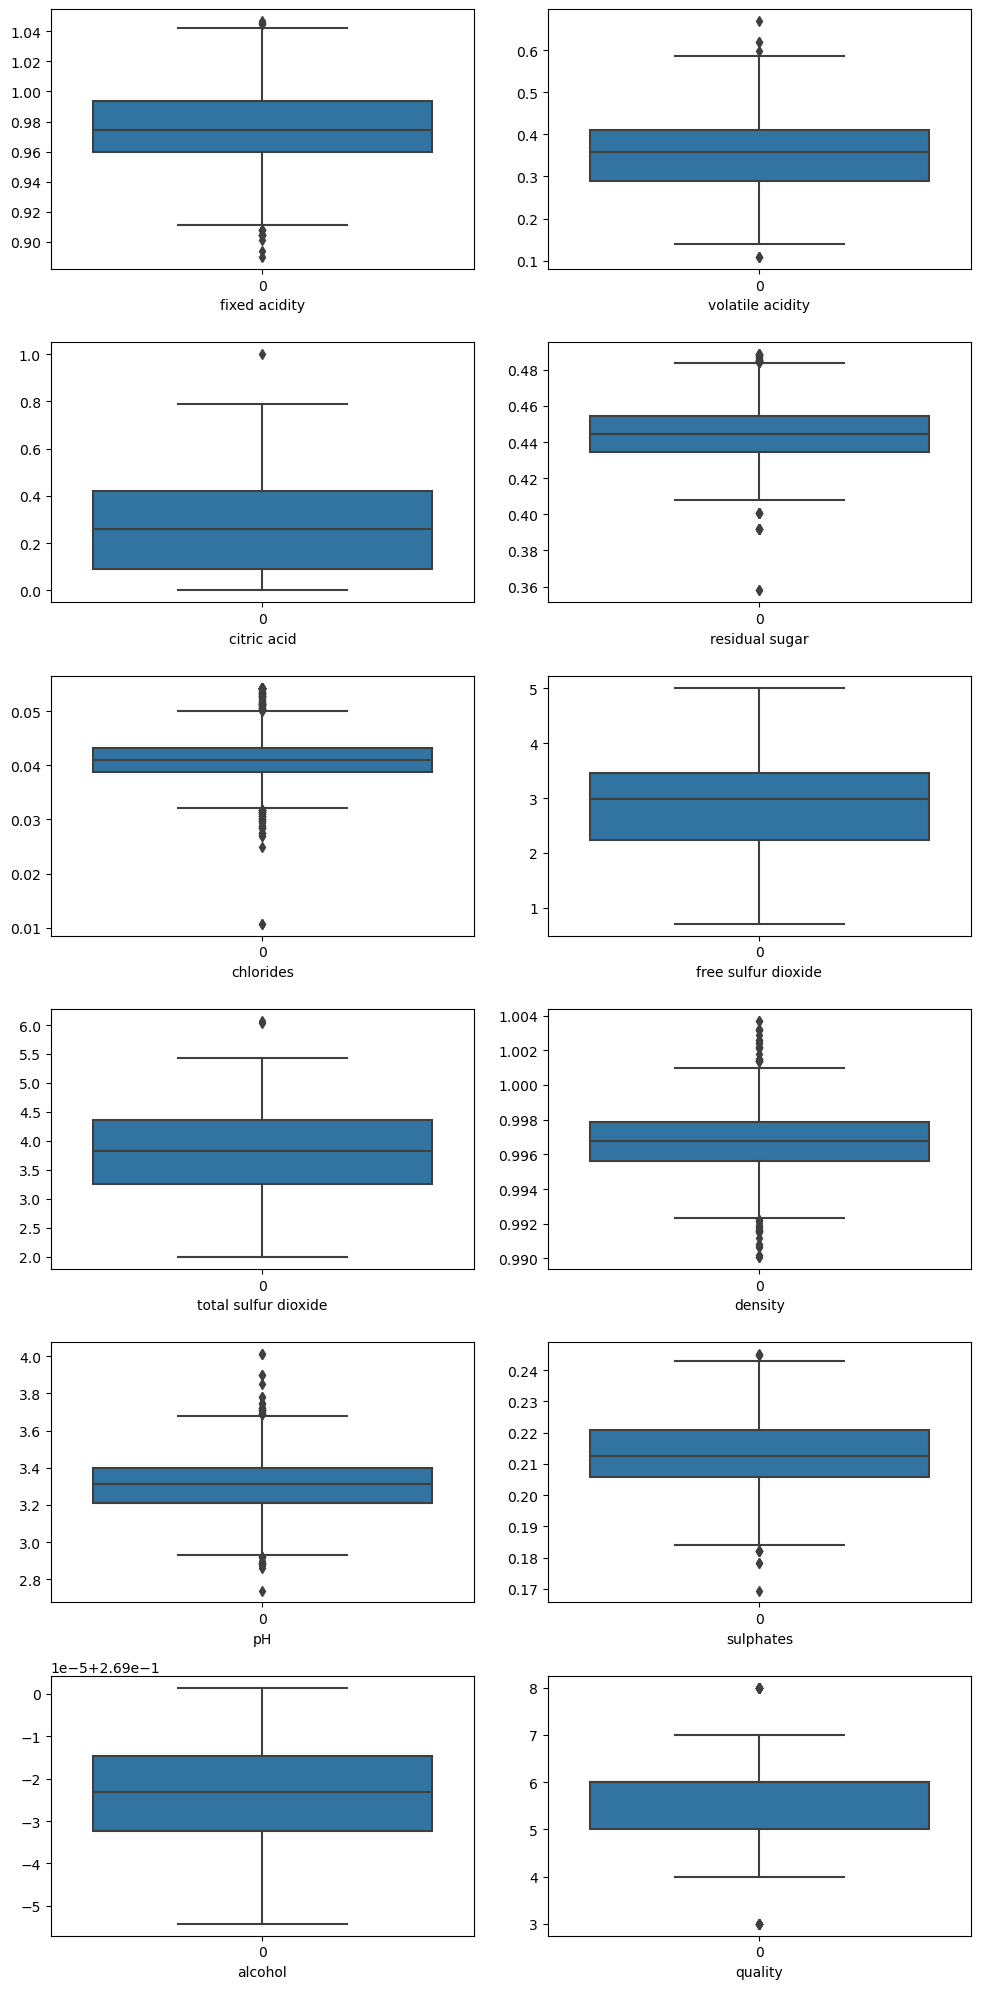

In [13]:
## CHecking Outliers
plt.figure(figsize = (10, 20))
number = 1
for col in df.columns:
    if number <= 12:
        plt.subplot(6, 2, number)
        sns.boxplot(data = df[col], orient = 'v')
        plt.xlabel(col)
    number+=1
plt.tight_layout()  

### Observations:
Most of the columns having outliers except aclohol

In [14]:
## removing outliers with IQR
q1 = np.percentile(df, 25)
q3 = np.percentile(df, 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
high_bound = q3 + (1.5 * iqr)
outliers = (df < lower_bound) | (df > high_bound)
df1 = df[~outliers.any(axis=1)]

old_data = df.shape[0]
new_data = df1.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)
    

Old data = 1599
New data =  1581
Loss data in percentage =  1.125703564727955


In [15]:
## removing outliers with z score
from scipy.stats import zscore
z = np.abs(zscore(df))
np.where(z>3)
df2 = df[(z<3).all(axis=1)]
old_data = df.shape[0]
new_data = df2.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)

Old data = 1599
New data =  1549
Loss data in percentage =  3.1269543464665412


### Observations
- Both outlier's score were in acceptable, however will go further with IQR due to having less data loss compare to z score

In [16]:
df = df1
df.shape

(1581, 12)

### Check Multicollinearity betweeen all columns

In [17]:
cor = df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255984,0.653496,0.205347,0.259402,-0.168633,-0.102603,0.673473,-0.713147,0.199611,-0.100287,0.109721
volatile acidity,-0.255984,1.000000,-0.567969,0.051246,0.146076,0.020125,0.086244,0.035626,0.225951,-0.316424,-0.212835,-0.395793
citric acid,0.653496,-0.567969,1.000000,0.173787,0.149790,-0.078749,0.007214,0.366672,-0.537969,0.332891,0.095810,0.218351
residual sugar,0.205347,0.051246,0.173787,1.000000,0.185809,0.085495,0.154958,0.438650,-0.079001,0.049574,0.092983,0.031856
chlorides,0.259402,0.146076,0.149790,0.185809,1.000000,-0.013099,0.085170,0.425396,-0.271748,0.143760,-0.322784,-0.181578
free sulfur dioxide,-0.168633,0.020125,-0.078749,0.085495,-0.013099,1.000000,0.780923,-0.034122,0.089432,0.058573,-0.084632,-0.041278
total sulfur dioxide,-0.102603,0.086244,0.007214,0.154958,0.085170,0.780923,1.000000,0.108921,-0.024427,0.038694,-0.252492,-0.166351
density,0.673473,0.035626,0.366672,0.438650,0.425396,-0.034122,0.108921,1.000000,-0.340448,0.187432,-0.460446,-0.157531
pH,-0.713147,0.225951,-0.537969,-0.079001,-0.271748,0.089432,-0.024427,-0.340448,1.000000,-0.108997,0.208413,-0.051280
sulphates,0.199611,-0.316424,0.332891,0.049574,0.143760,0.058573,0.038694,0.187432,-0.108997,1.000000,0.159355,0.336659


<AxesSubplot:>

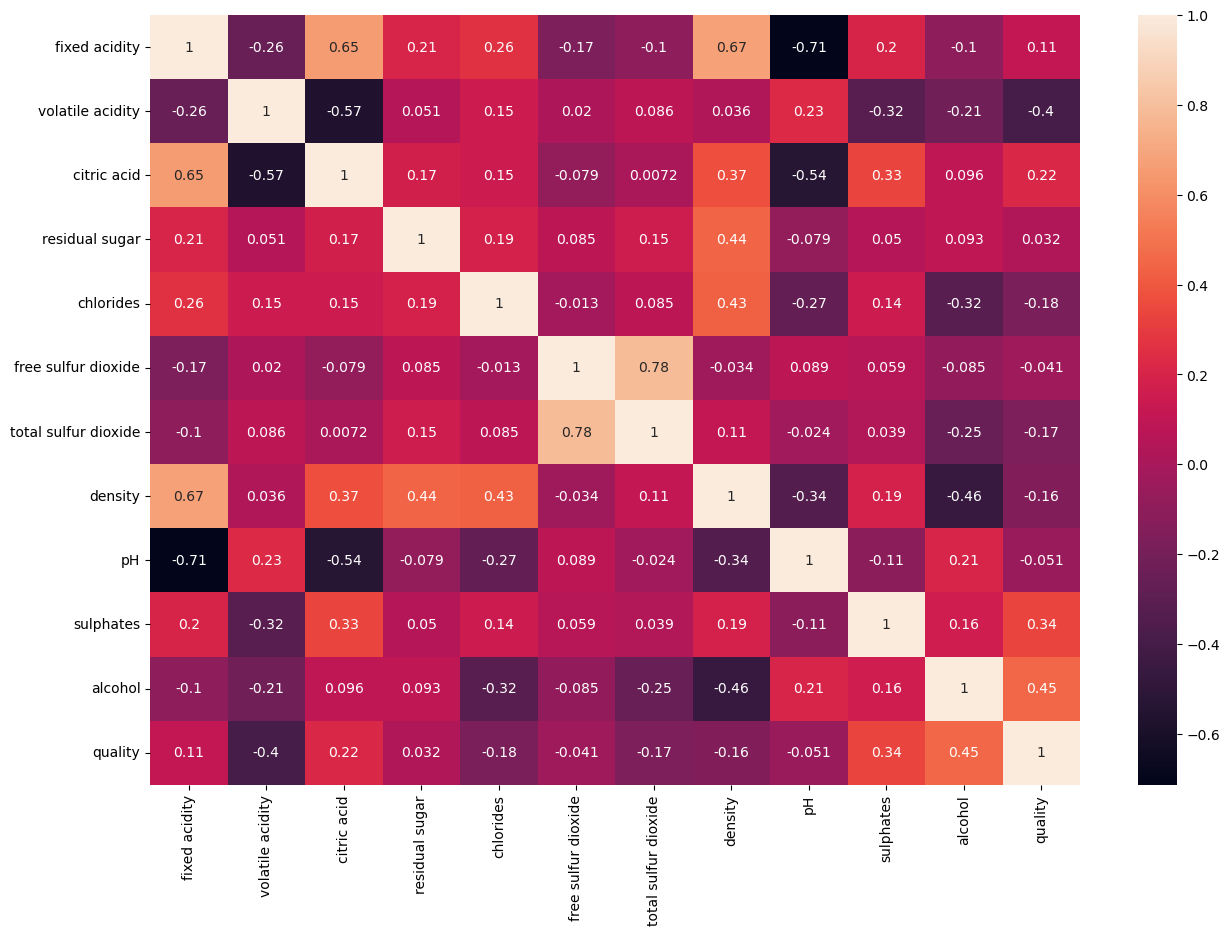

In [18]:
plt.figure(figsize = (15, 10))
sns.heatmap(cor, annot=True)

### Observations:
- Following features (quality, citrix acid, sulphates, alcohol) having postive correlation with label (quality), not that strong correlation
- Following features (volatile acidity, chlorides, total sulfur dioxide, density) having negative correlation with label (quality), not that strong correlation
- Also, noticed multicolinearity between features.

In [19]:
# Define the binary target variable based on cutoff
# 1 means good and 0 mean not good
df['target'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [20]:
x = df.drop(columns = ['quality', 'target'])
y = df.target

### Features Scaling and using Standard Scalrization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x1 = pd.DataFrame(x_scaled, columns = x.columns)
x1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.444004,0.988898,-1.387424,-0.597695,-0.180617,-0.272475,-0.129644,0.552707,1.290395,-0.572058,-1.067896
1,-0.161405,1.764827,-1.387424,0.557097,0.778676,0.991455,0.850044,0.019129,-0.725978,0.404555,-0.489579
2,-0.161405,1.263219,-1.181581,0.152525,0.553122,0.189764,0.535381,0.125845,-0.335712,0.193225,-0.489579
3,1.529914,-1.557259,1.494382,-0.597695,-0.233844,0.381737,0.688737,0.659423,-0.986155,-0.382760,-0.489579
4,-0.444004,0.988898,-1.387424,-0.597695,-0.180617,-0.272475,-0.129644,0.552707,1.290395,-0.572058,-1.067896
...,...,...,...,...,...,...,...,...,...,...,...
1576,-1.467034,0.491242,-0.975738,-0.381345,0.472446,1.395295,0.239240,-0.994669,0.900129,-0.382760,0.309885
1577,-1.774642,0.221080,-0.872816,-0.008631,-1.021048,1.726137,0.452464,-0.877282,1.355439,0.884212,0.909449
1578,-1.369772,-0.006478,-0.718433,0.152525,-0.180617,1.233035,0.102342,-0.546464,0.704996,0.830180,0.754772
1579,-1.774642,0.721850,-0.769894,-0.381345,-0.233844,1.395295,0.239240,-0.690530,1.680660,0.597724,-0.004033


In [22]:
x = x1

In [23]:
## Checking Multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_func = variance_inflation_factor
vif = pd.DataFrame()
vif['Vif'] = [VIF_func(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,Vif,Features
0,6.476037,fixed acidity
1,1.835712,volatile acidity
2,2.835674,citric acid
3,1.783926,residual sugar
4,1.378920,chlorides
5,2.827868,free sulfur dioxide
6,3.143686,total sulfur dioxide
7,5.897296,density
8,3.122582,pH
9,1.352770,sulphates


### Observation:
- Confirmed no strong correlation between features

In [24]:
y.value_counts()

0    1382
1     199
Name: target, dtype: int64

### Observation:
- Can see data set imbalance with try to resolve by SMOTE

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1, y1 = sm.fit_resample(x, y)

In [26]:
y.value_counts()

0    1382
1     199
Name: target, dtype: int64

In [27]:
y1.value_counts()

0    1382
1    1382
Name: target, dtype: int64

### Modelling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [29]:
### Creating train test split
x_train,x_test,y_train,y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 300)

In [30]:
### Classsification Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [31]:
RFC = RandomForestClassifier()
ETC = ExtraTreesClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()
LR = LogisticRegression()
svc = SVC()
DTC = DecisionTreeClassifier()
KNN = KNeighborsClassifier()

In [32]:
def metric_score(model, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        
        print(f"Model Name: {model_name}")
        print("\n---------------Train Result---------------")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
    elif train==False:
        pred = model.predict(x_test)
        
        print("\n---------------Test Result---------------")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        

In [33]:
models = [('RFC', RFC), ('ETC', ETC), ('GBC', ABC), ('BC', BC), ('LR', LR), ('svc', svc), ('DTC', DTC), ('KNN', KNN)]
for model_name, model in models:
    model.fit(x_train, y_train)    

In [34]:
for model_name, model in models:
    metric_score(model, x_train,x_test,y_train,y_test, train=True)
    metric_score(model, x_train,x_test,y_train,y_test, train=False)

Model Name: RFC

---------------Train Result---------------
Accuracy Score: 100.00%

---------------Test Result---------------
Accuracy Score: 93.78%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       351
           1       0.92      0.96      0.94       340

    accuracy                           0.94       691
   macro avg       0.94      0.94      0.94       691
weighted avg       0.94      0.94      0.94       691

Model Name: ETC

---------------Train Result---------------
Accuracy Score: 100.00%

---------------Test Result---------------
Accuracy Score: 95.08%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       351
           1       0.93      0.98      0.95       340

    accuracy                           0.95       691
   macro avg       0.95      0.95      0.95       691
weighted avg       0.95      0.95  

### Cross Validation to check whether selected models are over fitting

In [35]:
from sklearn.model_selection import cross_val_score


In [36]:
for model_name, model in models:
    score = cross_val_score(model, x1, y1, cv=5)
    print(f"Model Name: {model_name}")
    print('Accuracy Score = ',accuracy_score(y_test, model.predict(x_test)) * 100)
    print('Cross validation score = ', score.mean()* 100)
    print('Difference between Accuracy and Cross Validation Score = ', accuracy_score(y_test, model.predict(x_test)) - score.mean())
    print('\n')

Model Name: RFC
Accuracy Score =  93.77713458755427
Cross validation score =  91.82371517676967
Difference between Accuracy and Cross Validation Score =  0.01953419410784607


Model Name: ETC
Accuracy Score =  95.07959479015919
Cross validation score =  92.90923028539979
Difference between Accuracy and Cross Validation Score =  0.021703645047594033


Model Name: GBC
Accuracy Score =  84.80463096960926
Cross validation score =  82.48951699557094
Difference between Accuracy and Cross Validation Score =  0.023151139740383297


Model Name: BC
Accuracy Score =  92.47467438494935
Cross validation score =  90.23160887910475
Difference between Accuracy and Cross Validation Score =  0.022430655058445992


Model Name: LR
Accuracy Score =  82.77858176555716
Cross validation score =  79.92059124144981
Difference between Accuracy and Cross Validation Score =  0.028579905241073567


Model Name: svc
Accuracy Score =  87.69898697539797
Cross validation score =  85.60080719134105
Difference between Acc

### Conclusion:
- DTC is the best model, as difference between accuracy score and cross validation score is least compares to others model.

### Hyper parameter tuning for svc Model

In [37]:
## DTC
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = { 'criterion': ['gini', 'entropy'],
               'max_depth': range(10,15),
               'min_samples_split': range(3,8),
               'min_samples_leaf': range(2,6),
               'max_leaf_nodes' : range(5,10)
              
             }

In [56]:
gridsearch = GridSearchCV(DTC, param_grid, cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [57]:
gridsearch.best_score_

0.8210453407834235

In [58]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [65]:
Final_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_leaf_nodes = 9, min_samples_leaf = 2, min_samples_split = 3)
Final_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=2,
                       min_samples_split=3)

In [66]:
y_pred = Final_model.predict(x_train)
print("\n---------------Train Result---------------")
print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
pred = Final_model.predict(x_test)
print("\n---------------Test Result---------------")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))


---------------Train Result---------------
Accuracy Score: 83.84%

---------------Test Result---------------
Accuracy Score: 81.48%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.74      0.80       351
           1       0.77      0.89      0.83       340

    accuracy                           0.81       691
   macro avg       0.82      0.82      0.81       691
weighted avg       0.82      0.81      0.81       691



### Plotting ROC and compare AUC for Final_model

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

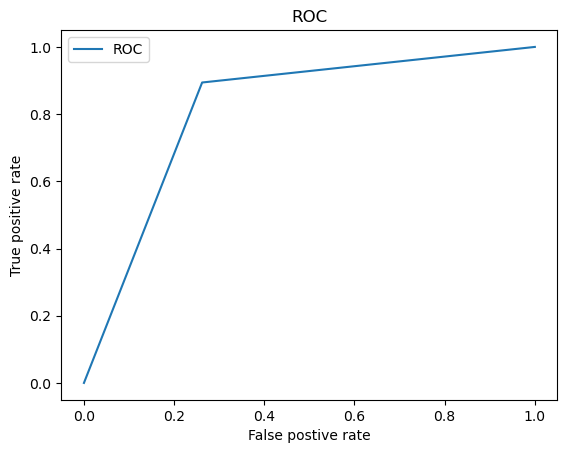

In [68]:
plt.plot(fpr, tpr, label = 'ROC')
plt.xlabel('False postive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend()
plt.show()

In [69]:
## AUC score
roc_auc = auc(fpr, tpr)
roc_auc


0.8160046924752807

### Saving the final model

In [70]:
import pickle

In [74]:
pickle.dump(Final_model, open('Red Wine Quality Prediction Project','wb'))

In [80]:
## Do the predication
loaded_model = pickle.load(open('Red Wine Quality Prediction Project','rb'))
predicted = loaded_model.predict(x_test)
original = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = predicted
df['Original'] = original
df

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,0,0
4,0,1
...,...,...
686,1,0
687,0,0
688,0,0
689,0,0


In [89]:
print(f"Accuracy Score: {accuracy_score(y_test, predicted) * 100:.2f}%")

Accuracy Score: 81.48%
